In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

In [2]:
my_transforms = transforms.ToTensor()

In [8]:
train_dataset = torchvision.datasets.FashionMNIST(download=True, transform=my_transforms, train=True, root="data")
test_dataset = torchvision.datasets.FashionMNIST(download=True, transform=my_transforms, train=False, root="data")

0it [00:00, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz


0it [00:00, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...


z:\installs\anconda\envs\myenv\lib\site-packages\torchvision\datasets\mnist.py:335: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed).view(length, num_rows, num_cols)


Done!


In [9]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [10]:
X,y = train_dataset[0]

In [13]:
X.shape, y

(torch.Size([1, 28, 28]), 9)

In [23]:
def get_text_from_label(labels):
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']

    return [text_labels[int(i)] for i in labels]

In [25]:
batch_size = 32
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

['ankle boot']


(<matplotlib.image.AxesImage at 0x1a8101e8700>, None)

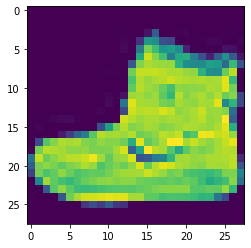

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X.permute(1,2,0)), print(get_text_from_label([y]))

In [28]:

%%time

# the time it takes to read the data

for X,y in train_dataloader:
    continue

Wall time: 3.65 s


In [29]:
test_dataloader= data.DataLoader(test_dataset,batch_size=32, shuffle=False, num_workers=4)

Exercises
1. Does reducing the batch_size (for instance, to 1) affect the reading performance?

increases

2. The data iterator performance is important. Do you think the current implementation is fast
enough? Explore various options to improve it.

https://stackoverflow.com/questions/61393613/pytorch-speed-up-data-loading

3. Check out the frameworkʼs online API documentation. Which other datasets are available?

In [30]:
#1

# train_dataloader= data.DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=4)

In [32]:
%%time

for X, y in train_dataloader:
    continue

Wall time: 37.9 s


In [35]:
#3

print(dir(torchvision.datasets))

['CIFAR10', 'CIFAR100', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'DatasetFolder', 'EMNIST', 'FakeData', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'ImageFolder', 'KMNIST', 'LSUN', 'LSUNClass', 'MNIST', 'Omniglot', 'PhotoTour', 'SBU', 'SEMEION', 'STL10', 'SVHN', 'VOCDetection', 'VOCSegmentation', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'cifar', 'cityscapes', 'coco', 'fakedata', 'flickr', 'folder', 'lsun', 'mnist', 'omniglot', 'phototour', 'sbu', 'semeion', 'stl10', 'svhn', 'utils', 'voc']


# Implementing softmax from scratch

In [ ]:
#implementing the 